In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
cost = pd.read_csv('COST.csv',index_col='Date',parse_dates=True)['Adj Close']

In [4]:
cost

Date
2016-09-06    140.896622
2016-09-07    138.739395
2016-09-08    136.805038
2016-09-09    134.335831
2016-09-12    135.218338
                 ...    
2021-08-27    450.339996
2021-08-30    455.929993
2021-08-31    455.489990
2021-09-01    456.519989
2021-09-02    460.970001
Name: Adj Close, Length: 1258, dtype: float64

In [5]:
wmt = pd.read_csv('WMT.csv',index_col='Date',parse_dates=True)['Adj Close']

In [6]:
wmt

Date
2016-09-06     65.758080
2016-09-07     64.911324
2016-09-08     64.704163
2016-09-09     63.325943
2016-09-12     64.803238
                 ...    
2021-08-27    146.520004
2021-08-30    147.699997
2021-08-31    148.100006
2021-09-01    147.779999
2021-09-02    148.559998
Name: Adj Close, Length: 1258, dtype: float64

In [7]:
tgt = pd.read_csv('TGT.csv',index_col='Date',parse_dates=True)['Adj Close']

In [8]:
tgt

Date
2016-09-06     60.674061
2016-09-07     60.847187
2016-09-08     60.120117
2016-09-09     59.721989
2016-09-12     59.981625
                 ...    
2021-08-27    249.179993
2021-08-30    249.360001
2021-08-31    246.979996
2021-09-01    246.369995
2021-09-02    245.809998
Name: Adj Close, Length: 1258, dtype: float64

In [9]:
dg = pd.read_csv('DG.csv',index_col='Date',parse_dates=True)['Adj Close']

In [10]:
dg

Date
2016-09-06     68.342621
2016-09-07     68.105331
2016-09-08     67.080215
2016-09-09     66.994766
2016-09-12     68.366478
                 ...    
2021-08-27    225.250000
2021-08-30    225.360001
2021-08-31    222.910004
2021-09-01    222.690002
2021-09-02    224.960007
Name: Adj Close, Length: 1258, dtype: float64

<Axes: xlabel='Date'>

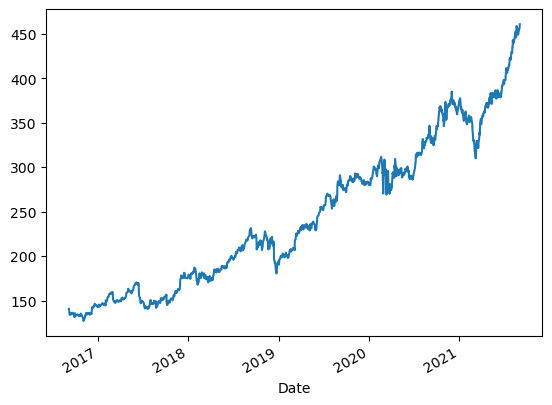

In [11]:
cost.plot()

In [12]:
retail = pd.concat([cost,wmt,tgt,dg],axis=1)
retail.columns = ['COST','WMT','TGT','DG']

In [13]:
retail

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,140.896622,65.758080,60.674061,68.342621
2016-09-07,138.739395,64.911324,60.847187,68.105331
2016-09-08,136.805038,64.704163,60.120117,67.080215
2016-09-09,134.335831,63.325943,59.721989,66.994766
2016-09-12,135.218338,64.803238,59.981625,68.366478
...,...,...,...,...
2021-08-27,450.339996,146.520004,249.179993,225.250000
2021-08-30,455.929993,147.699997,249.360001,225.360001
2021-08-31,455.489990,148.100006,246.979996,222.910004


In [14]:
retail_returns = retail.pct_change(1).dropna()

In [15]:
retail_returns

,COST,WMT,TGT,DG
Date,,,,
2016-09-07,-0.015311,-0.012877,0.002853,-0.003472
2016-09-08,-0.013942,-0.003191,-0.011949,-0.015052
2016-09-09,-0.018049,-0.021300,-0.006622,-0.001274
2016-09-12,0.006569,0.023328,0.004347,0.020475
2016-09-13,-0.006263,-0.006672,-0.005195,-0.019368
...,...,...,...,...
2021-08-27,0.002292,-0.005633,0.000884,-0.002877
2021-08-30,0.012413,0.008053,0.000722,0.000488
2021-08-31,-0.000965,0.002708,-0.009544,-0.010871


<Axes: xlabel='Date'>

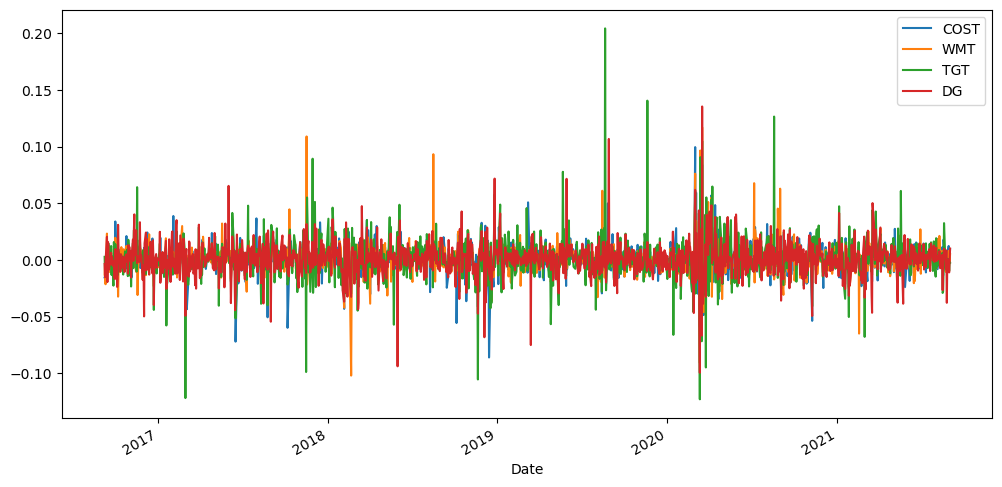

In [16]:
retail_returns.plot(figsize=(12,6))

<Axes: ylabel='Frequency'>

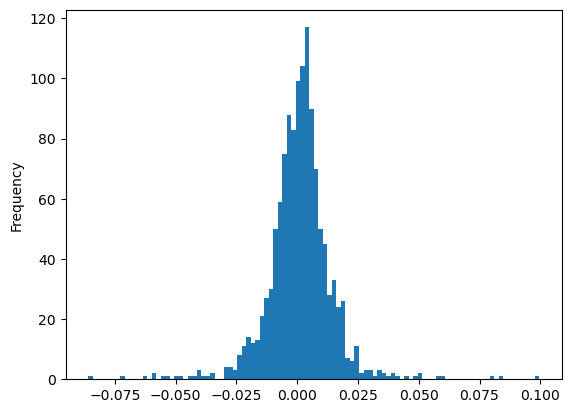

In [17]:
retail_returns['COST'].plot(kind='hist',bins=100)

<Axes: xlabel='Date'>

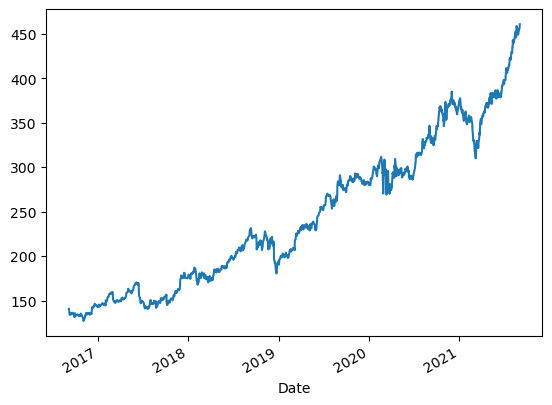

In [18]:
retail['COST'].plot()

In [19]:
cumul_return = (1 + retail_returns['COST']).cumprod() - 1

In [20]:
cumul_return

Date
2016-09-07   -0.015311
2016-09-08   -0.029040
2016-09-09   -0.046565
2016-09-12   -0.040301
2016-09-13   -0.046311
                ...   
2021-08-27    2.196244
2021-08-30    2.235919
2021-08-31    2.232796
2021-09-01    2.240106
2021-09-02    2.271690
Name: COST, Length: 1257, dtype: float64

In [21]:
cumul_perc_return = 100 * cumul_return

In [22]:
cumul_perc_return

Date
2016-09-07     -1.531071
2016-09-08     -2.903962
2016-09-09     -4.656457
2016-09-12     -4.030107
2016-09-13     -4.631149
                 ...    
2021-08-27    219.624409
2021-08-30    223.591855
2021-08-31    223.279567
2021-09-01    224.010599
2021-09-02    227.168952
Name: COST, Length: 1257, dtype: float64

<Axes: xlabel='Date'>

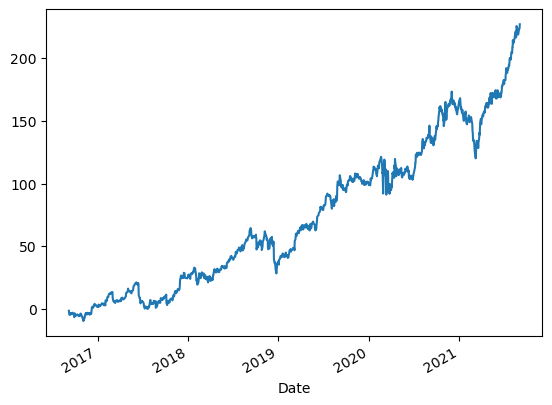

In [23]:
cumul_perc_return.plot()

In [24]:
n = len(retail_returns.columns)

In [25]:
n

4

In [26]:
equal_weights = n * [1/n]

In [27]:
equal_weights

[0.25, 0.25, 0.25, 0.25]

In [28]:
equal_returns = np.dot(equal_weights, retail_returns.transpose())

In [29]:
equal_returns

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [30]:
cum_equal_weights_return = (1+ equal_returns).cumprod() - 1

In [31]:
cum_equal_weights_return

array([-0.00720156, -0.01815581, -0.02975273, ...,  2.32411376,
        2.32132463,  2.34037771])

In [32]:
cum_equal_weights_return_percent = 100 * cum_equal_weights_return

In [33]:
cewrp = pd.Series(cum_equal_weights_return_percent,index=retail_returns.index)

In [34]:
cewrp

Date
2016-09-07     -0.720156
2016-09-08     -1.815581
2016-09-09     -2.975273
2016-09-12     -1.647971
2016-09-13     -2.569954
                 ...    
2021-08-27    232.170295
2021-08-30    233.970413
2021-08-31    232.411376
2021-09-01    232.132463
2021-09-02    234.037771
Length: 1257, dtype: float64

<Axes: xlabel='Date'>

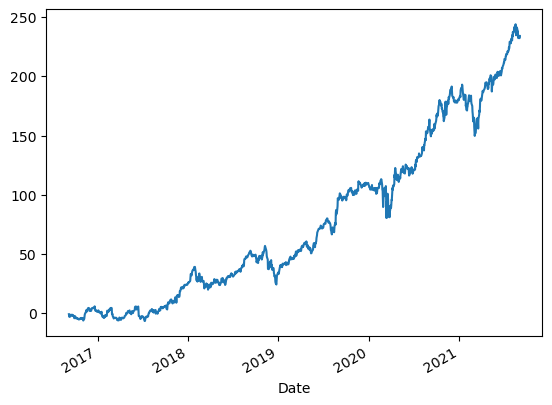

In [35]:
cewrp.plot()

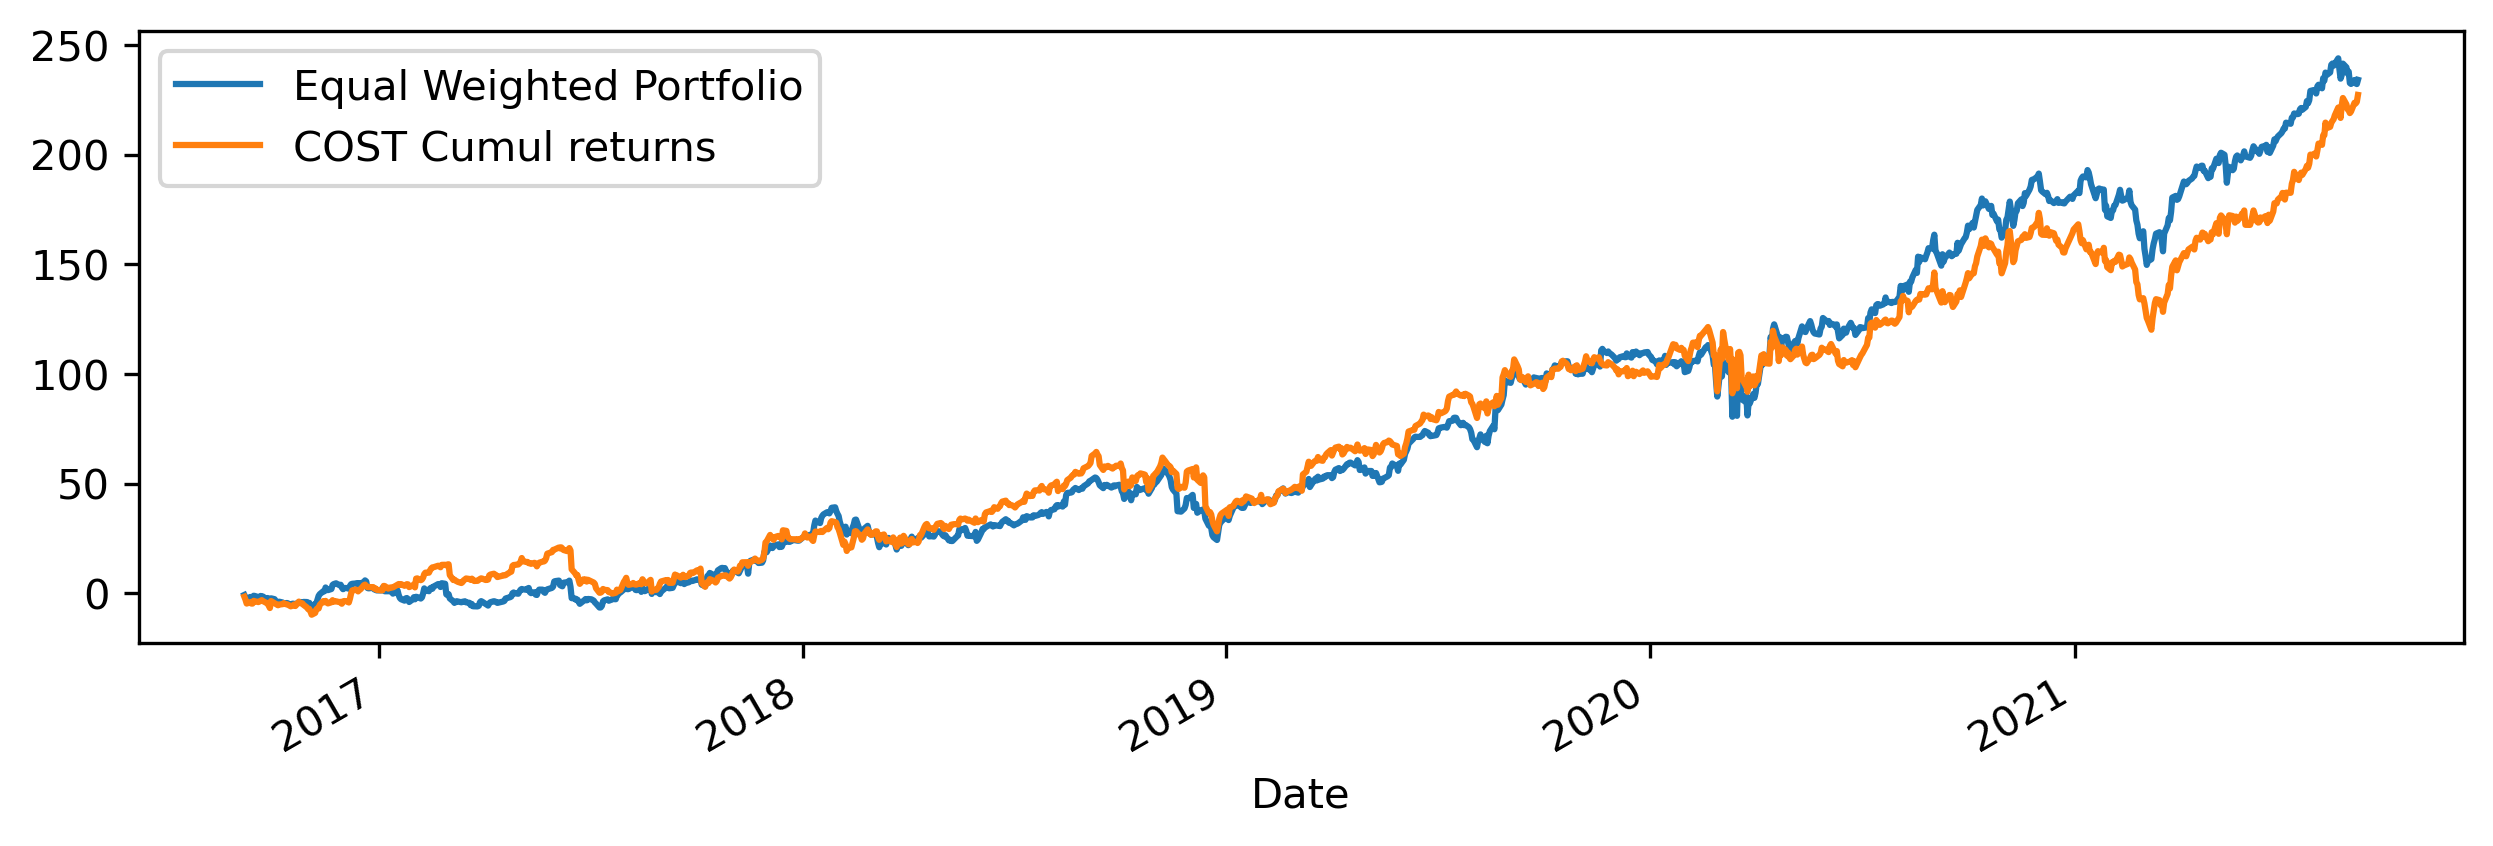

In [36]:
plt.figure(figsize=(10,3),dpi=300)
cewrp.plot(label='Equal Weighted Portfolio')
cumul_perc_return.plot(label='COST Cumul returns')
plt.legend()

In [37]:
retail / retail.shift(1)

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,0.984689,0.987123,1.002853,0.996528
2016-09-08,0.986058,0.996809,0.988051,0.984948
2016-09-09,0.981951,0.978700,0.993378,0.998726
2016-09-12,1.006569,1.023328,1.004347,1.020475
...,...,...,...,...
2021-08-27,1.002292,0.994367,1.000884,0.997123
2021-08-30,1.012413,1.008053,1.000722,1.000488
2021-08-31,0.999035,1.002708,0.990456,0.989129


In [38]:
log_returns = np.log(retail / retail.shift(1))

In [39]:
log_returns

,COST,WMT,TGT,DG
Date,,,,
2016-09-06,NaN,NaN,NaN,NaN
2016-09-07,-0.015429,-0.012960,0.002849,-0.003478
2016-09-08,-0.014040,-0.003197,-0.012021,-0.015166
2016-09-09,-0.018214,-0.021530,-0.006644,-0.001275
2016-09-12,0.006548,0.023060,0.004338,0.020268
...,...,...,...,...
2021-08-27,0.002290,-0.005649,0.000883,-0.002882
2021-08-30,0.012336,0.008021,0.000722,0.000488
2021-08-31,-0.000966,0.002705,-0.009590,-0.010931


In [40]:
n = len(retail.columns)

In [44]:
def gen_weights(n):
    weights = weights = np.random.random(n)
    return weights / np.sum(weights)

In [45]:
gen_weights(4)

array([0.21085117, 0.13247234, 0.36617694, 0.29049955])

In [46]:
def calc_return(weights,log_returns):
    return np.sum(log_returns.mean() * weights) * 252

In [47]:
log_returns.cov()

,COST,WMT,TGT,DG
COST,0.000176,0.000107,0.000120,0.000104
WMT,0.000107,0.000187,0.000121,0.000108
TGT,0.000120,0.000121,0.000370,0.000170
DG,0.000104,0.000108,0.000170,0.000248


In [48]:
def calc_volatility (weights,log_returns_cov):
    annualized_cov = np.dot(log_returns_cov*252, weights)
    vol = np.dot(weights.transpose(), annualized_cov)
    return np.sqrt(vol)

In [49]:
calc_volatility(weights,log_returns.cov())

0.4691826790191674

In [50]:
log_returns = np.log(retail/retail.shift(1))
log_returns_cov = log_returns.cov()

In [51]:
mc_portfolio_returns = []
mc_portfolio_vol = []
mc_weights = []

for sim in range(3000):
    weights = gen_weights(n=4)
    mc_weights.append(weights)
    sim_returns = calc_return(weights,log_returns)
    mc_portfolio_returns.append(sim_returns)
    sim_vol = calc_volatility(weights,log_returns_cov)
    mc_portfolio_vol.append(sim_vol)

In [52]:
len(mc_portfolio_returns)

3000

In [53]:
mc_sharpe_ratios = np.array(mc_portfolio_returns)/np.array(mc_portfolio_vol)

Text(0, 0.5, 'Return')

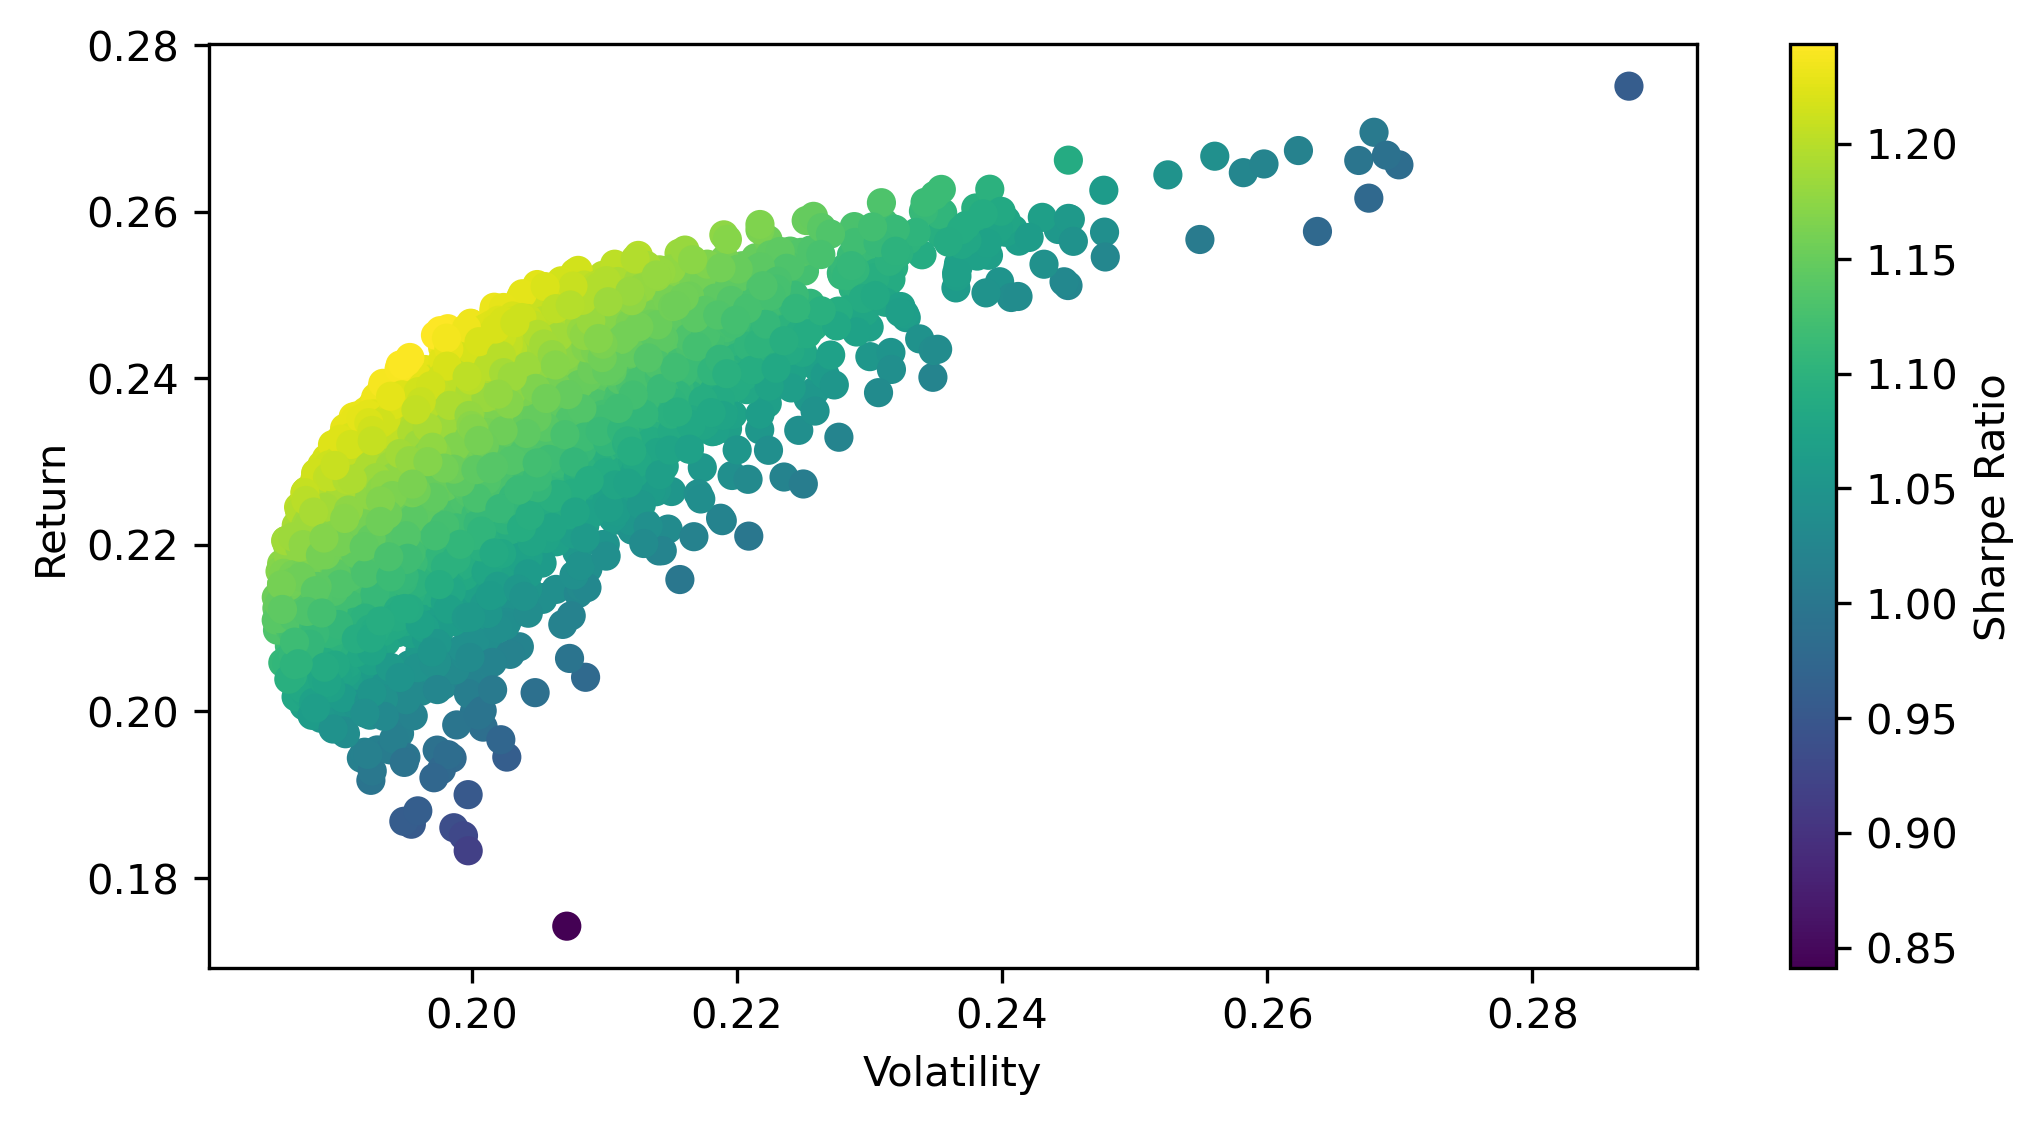

In [57]:
plt.figure(dpi=300,figsize=(8,4))
plt.scatter(mc_portfolio_vol,mc_portfolio_returns,c=mc_sharpe_ratios)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

In [58]:
np.argmax(mc_sharpe_ratios)

2484

In [59]:
mc_weights[2484]

array([0.54265571, 0.00946866, 0.19765366, 0.25022196])